## EDA

* 研究背景
* 動機
* 文獻探討
* 資料來源
* 單、雙變數分析
* 統計檢定
* Preprocessing 
* Model Evaluation
* Conclusion

Columns:

`Education` : The educational qualifications of employees, including degree, institution, and field of study.

`Joining Year` : The year each employee joined the company, indicating their length of service.

`City` : The location or city where each employee is based or works.

`Payment Tier` : Categorization of employees into different salary tiers. (數字越小層級越高)

`Age` : The age of each employee, providing demographic insights.

`Gender` : Gender identity of employees, promoting diversity analysis.

`Ever Benched` : Indicates if an employee has ever been temporarily without assigned work.

`Experience in Current Domain` : The number of years of experience employees have in their current field.

`Leave or Not` : a target column 預測是否離職

In [1]:
#Data Handling
import numpy as np 
import pandas as pd 

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#statistics
from scipy import stats

In [2]:
data = pd.read_csv('Employee.csv')
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
data['LeaveOrNot'] = data['LeaveOrNot'].astype(object)
data['PaymentTier'] = data['PaymentTier'].astype(object)

In [5]:
data.shape

(4653, 9)

In [6]:
import os
pic_path = './picture/'

In [7]:
tmp  = list(data.dtypes != np.int64)
cols = data.columns[tmp].tolist()
print(cols)

['Education', 'City', 'PaymentTier', 'Gender', 'EverBenched', 'LeaveOrNot']


In [8]:
tmp  = list(data.dtypes == np.int64)
num_cols = data.columns[tmp].tolist()
print(num_cols)

['JoiningYear', 'Age', 'ExperienceInCurrentDomain']


In [9]:
def plot_hist(name):
    sns.countplot(x = name, data = data)
    plt.ylabel('Total')
    plt.xlabel(name)
    plt.savefig(os.path.join(pic_path, name))
    plt.figure().clear()

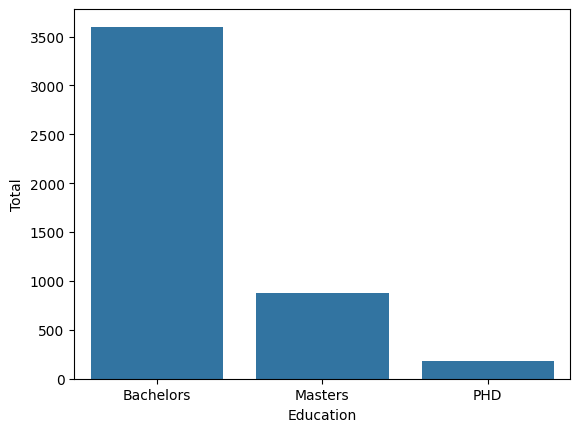

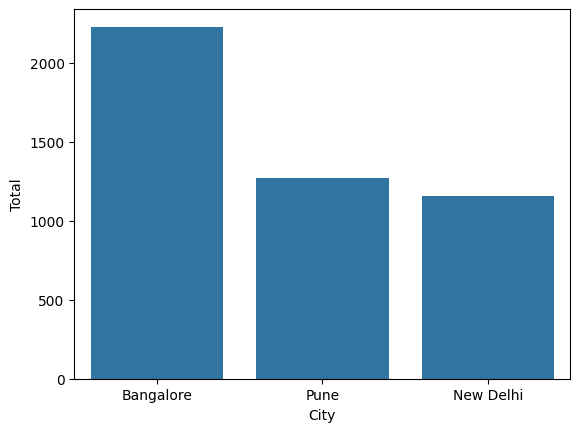

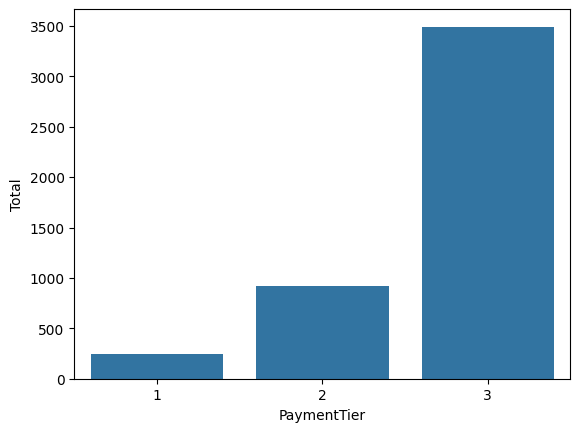

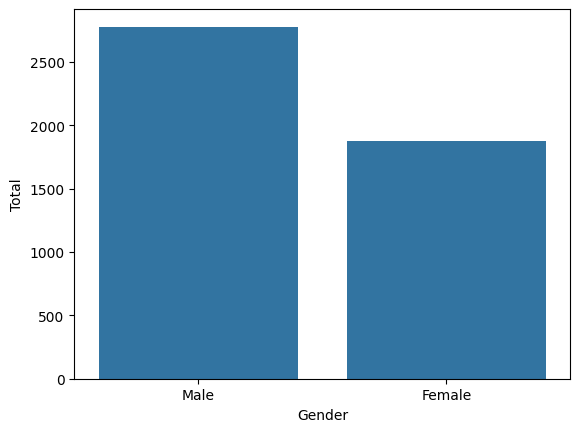

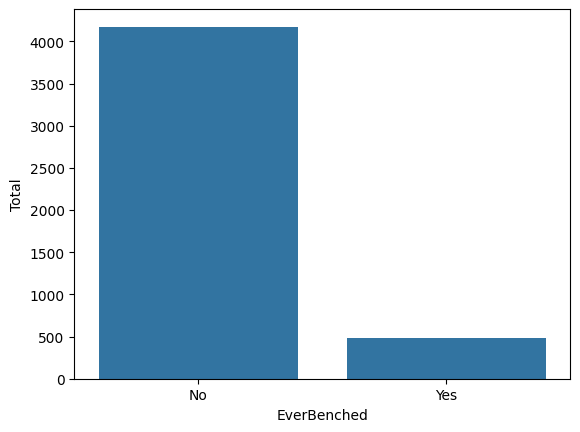

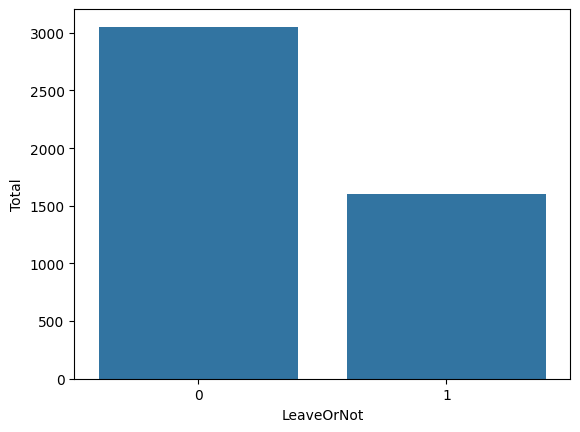

<Figure size 640x480 with 0 Axes>

In [10]:
tmp = list(map(plot_hist, cols))

In [31]:
def plot_box(name):
    sns.boxplot(data = data, x = name)
    plt.xlabel(name)
    plt.savefig(os.path.join(pic_path, name))
    plt.figure().clear()

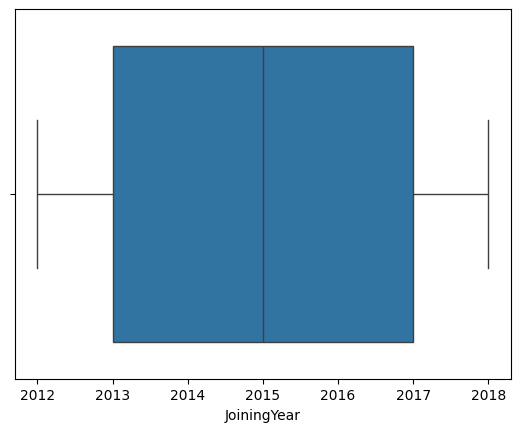

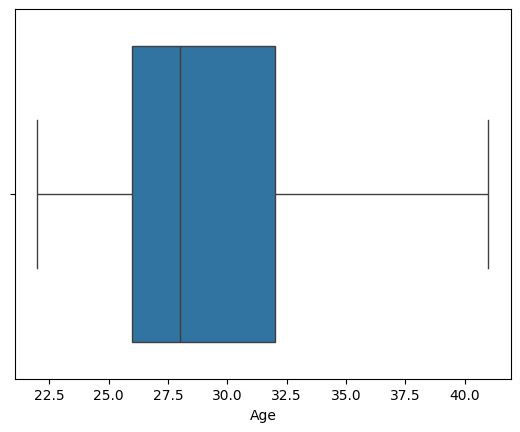

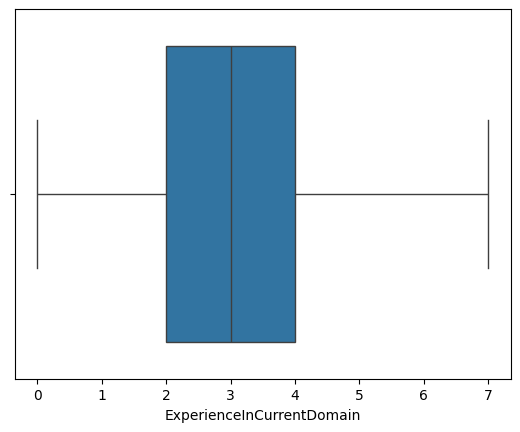

<Figure size 640x480 with 0 Axes>

In [32]:
tmp = list(map(plot_box, num_cols))

In [33]:
cols.remove('LeaveOrNot')
print(cols)

['Education', 'City', 'PaymentTier', 'Gender', 'EverBenched']


In [34]:
def plot_bi_hist(name):
    sns.countplot(x = name, data = data, hue = 'LeaveOrNot')
    plt.ylabel('Total')
    plt.xlabel(name)
    name = "bivariate_" + name
    plt.savefig(os.path.join(pic_path, name))
    plt.figure().clear()

In [35]:
def plot_bi_box(name):
    sns.boxplot(data = data, x = 'LeaveOrNot', y = name)
    name = "bivariate_" + name
    plt.savefig(os.path.join(pic_path, name))
    plt.figure().clear()

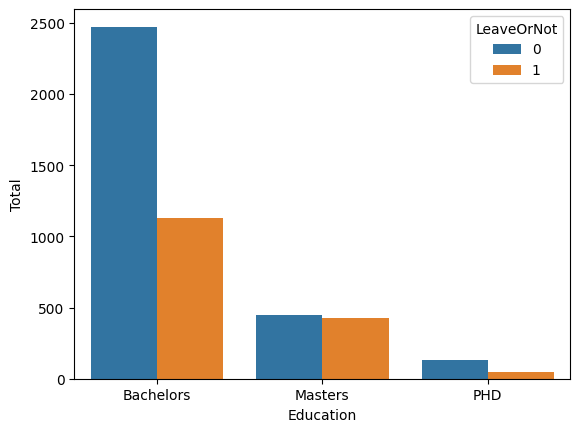

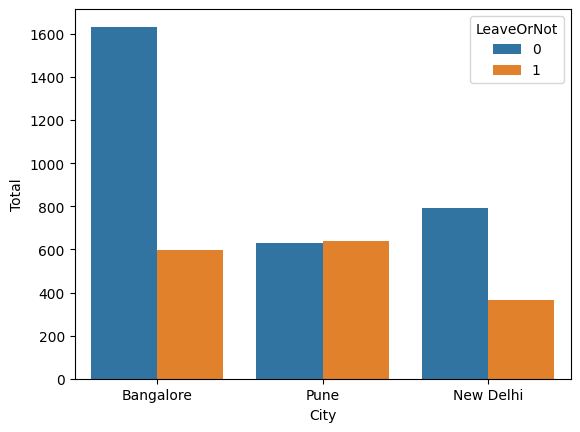

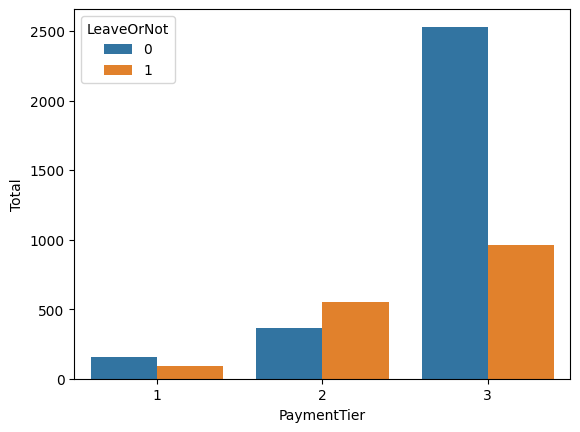

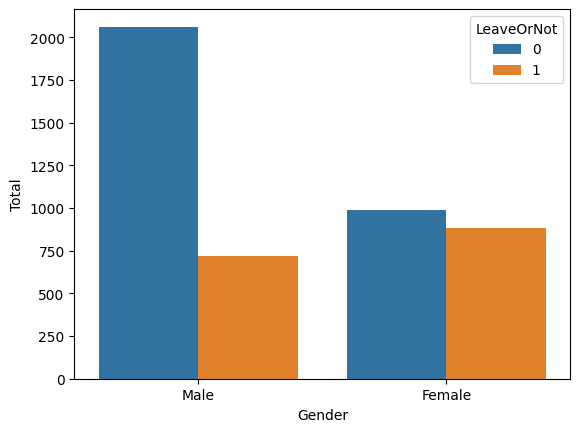

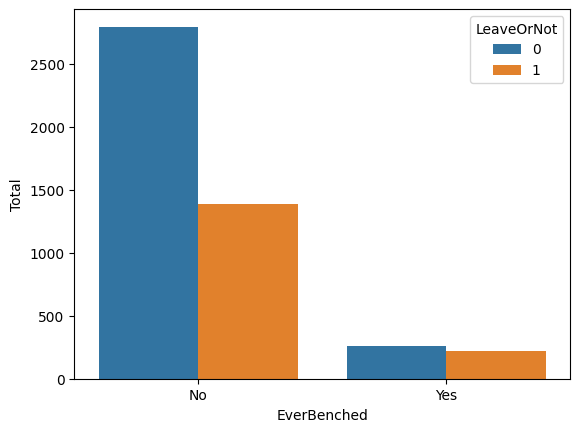

<Figure size 640x480 with 0 Axes>

In [36]:
tmp = list(map(plot_bi_hist, cols))

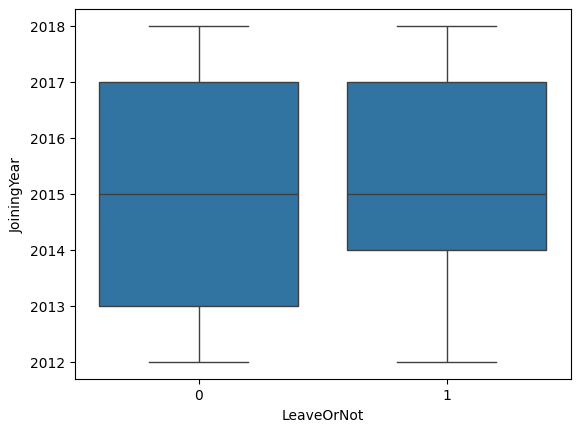

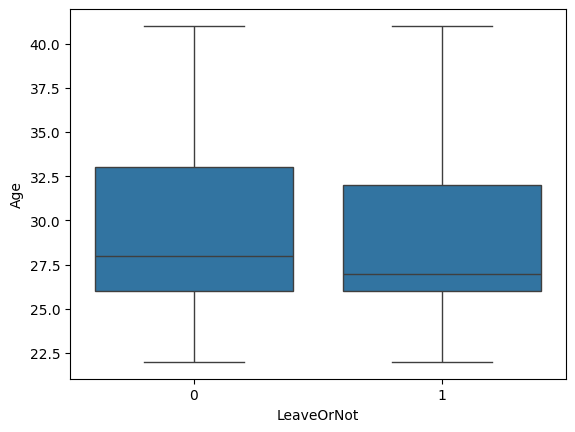

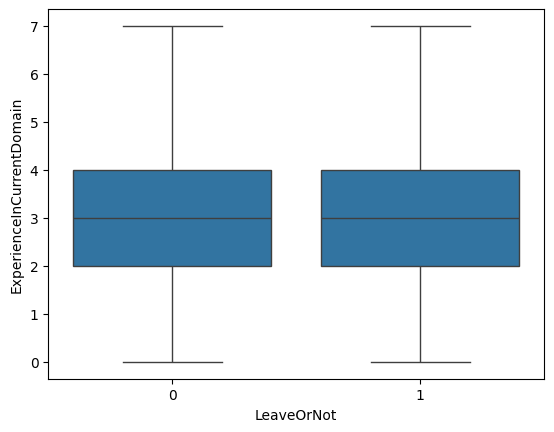

<Figure size 640x480 with 0 Axes>

In [37]:
tmp = list(map(plot_bi_box, num_cols))

In [38]:
def stats_test(col):
  if data[col].dtype == np.int64 or data[col].dtype == np.float64:
    tmp0 = data.loc[data['LeaveOrNot'] == 0, col].values
    tmp1 = data.loc[data['LeaveOrNot'] == 1, col].values

    result = stats.ttest_ind(tmp0, tmp1)[0:2]

  else:
    contingency_table = data.pivot_table(index = [col], columns = 'LeaveOrNot', values = 'Age', aggfunc = 'count')
    contingency_table = contingency_table.fillna(0)
    contingency_table = contingency_table.values

    result = stats.chi2_contingency(contingency_table, correction = False)[0:2]

  return result

### 檢定結果

In [39]:
all_cols = data.columns[:-1].tolist()
results = {c: stats_test(c) for c in all_cols}
print(results)

{'Education': (101.83014138498626, 7.724417739147332e-23), 'JoiningYear': (-12.601776125876363, 7.90161666436133e-36), 'City': (206.15885400194648, 1.7106992135618012e-45), 'PaymentTier': (338.6305486794045, 2.9329904732261673e-74), 'Age': (3.491261554959713, 0.0004852123420648861), 'Gender': (226.64164837884488, 3.219334068915125e-51), 'EverBenched': (28.627472496502868, 8.772866504669789e-08), 'ExperienceInCurrentDomain': (2.081296101564669, 0.037461383540452)}


全部都顯著，加上feature selection應該要來回對照，所以就先全部餵進去吧

In [40]:
seed = 1126

In [41]:
x = data.drop(['LeaveOrNot'], axis=1)
y = data['LeaveOrNot'].astype(np.int64)

In [42]:
import category_encoders as ce
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed, stratify = y)

如果你是用lightgbm或catboost的話，他可以直接吃categorical data

用簡單的leave-one-out target encoding encode categorical data

In [44]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [45]:
encoder = ce.LeaveOneOutEncoder(cols = cols, sigma = 0.05)
encoder.fit(x_train, y_train)
x_train = encoder.transform(x_train)
x_test = encoder.transform(x_test)

In [46]:
x_train.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
939,0.30982,2017,0.496538,0.271813,27,0.256901,0.33094,5
3326,0.30982,2017,0.496538,0.599185,33,0.476287,0.33094,2
3113,0.30982,2014,0.269016,0.271813,40,0.476287,0.33094,0
69,0.50142,2017,0.269016,0.271813,40,0.476287,0.33094,2
3546,0.50142,2018,0.496538,0.271813,31,0.256901,0.33094,2


將數值資料standardize

In [47]:
from sklearn.preprocessing import StandardScaler

std_encoder = StandardScaler()
x_train = std_encoder.fit_transform(x_train)
x_test = std_encoder.transform(x_test)

In [48]:
x_train[0:3]

array([[-0.44294974,  1.03450786,  1.59624031, -0.55293904, -0.49837554,
        -0.81065918, -0.33720078,  1.34599141],
       [-0.44294974,  1.03450786,  1.59624031,  1.95811516,  0.74294975,
         1.23356403, -0.33720078, -0.59028018],
       [-0.44294974, -0.57767843, -0.7831341 , -0.55293904,  2.19116258,
         1.23356403, -0.33720078, -1.88112791]])

In [49]:
print(x_train.shape)
print(x_test.shape)

(3722, 8)
(931, 8)


In [50]:
x_train_copy = pd.DataFrame(x_train, columns = data.columns[:-1])
x_train_copy.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,-0.442950,1.034508,1.596240,-0.552939,-0.498376,-0.810659,-0.337201,1.345991
1,-0.442950,1.034508,1.596240,1.958115,0.742950,1.233564,-0.337201,-0.590280
2,-0.442950,-0.577678,-0.783134,-0.552939,2.191163,1.233564,-0.337201,-1.881128
3,2.047278,1.034508,-0.783134,-0.552939,2.191163,1.233564,-0.337201,-0.590280
4,2.047278,1.571903,1.596240,-0.552939,0.329175,-0.810659,-0.337201,-0.590280


<Axes: >

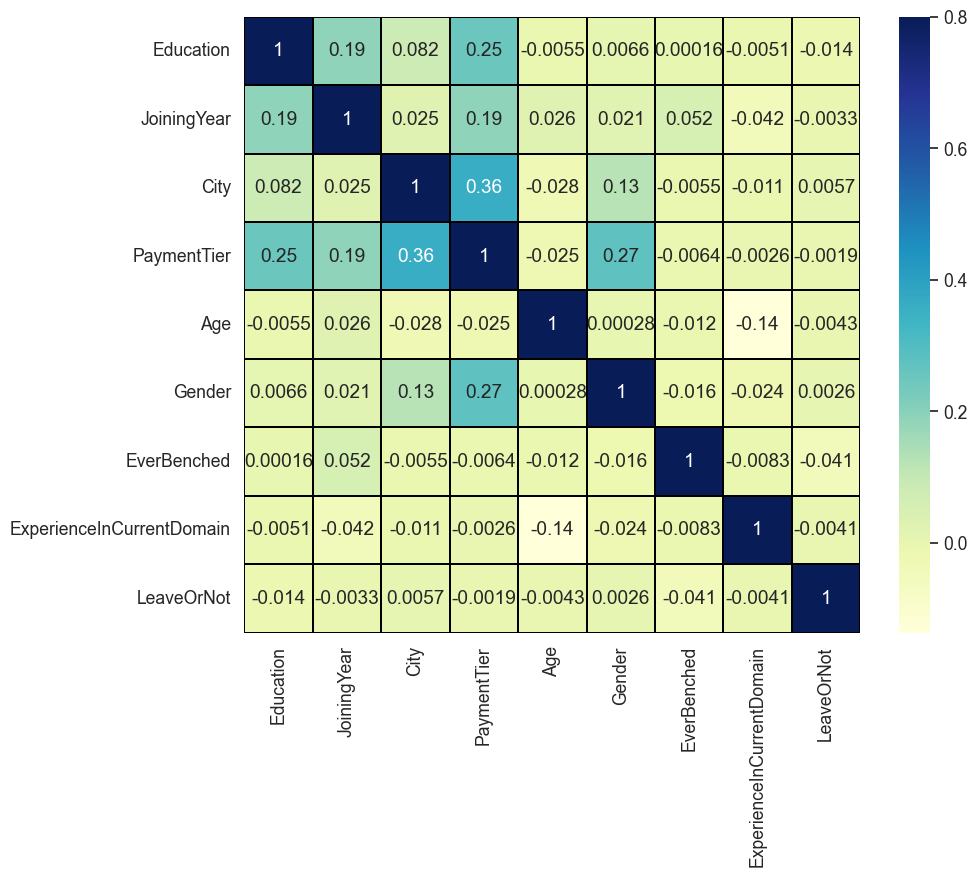

In [51]:
sns.set(font_scale = 1.15)
plt.figure(figsize = (10, 8))
sns.heatmap(pd.concat([x_train_copy, y_train], axis = 1).corr(), vmax = 0.8, linewidths = 0.01, square = True, 
            annot = True, cmap='YlGnBu',
linecolor = 'black')

用border line smote去做upsampling

In [52]:
from imblearn.over_sampling import BorderlineSMOTE

smote_enn = BorderlineSMOTE(random_state = seed)
x_train_resampled, y_train_resampled = smote_enn.fit_resample(x_train, y_train)

直接補到0 1同樣數量

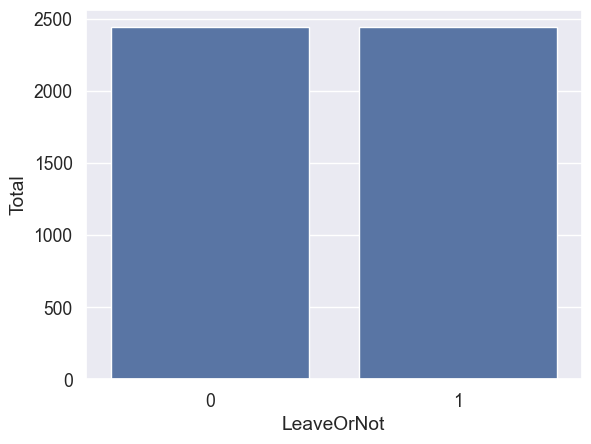

In [53]:
sns.countplot(x = y_train_resampled)
plt.ylabel('Total')
plt.xlabel('LeaveOrNot')
plt.show()

In [54]:
y_train_resampled.shape

(4884,)

## SVM, MLP, GBM

In [55]:
## 定義評估函數
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from pprint import pprint

def eval_pipeline(y_test, y_pred, y_pred_prob):
    report = classification_report(y_test, y_pred, output_dict = True).get('0')
    auc = roc_auc_score(y_test, y_pred_prob)
    report['auc'] = auc
    pprint(report)
    return report

def plot_confusion_matrix(y_test, y_pred, title = None):
    title = 'Confusion Matrix' + title if title else 'Confusion Matrix'
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
def plot_roc_curve(y_test, y_pred, title):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, color = 'darkorange', lw = 2)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    title = 'ROC Curve' + title if title else 'ROC Curve'
    plt.title('ROC Curve')
    plt.show()

### SVM

In [56]:
from sklearn import svm

def svm_model(kernel, x_train, y_train, x_test, y_test,):
    print("Kernel: ", kernel)
    clf_svm = svm.SVC(random_state = seed, kernel=kernel, probability=True)
    clf_svm.fit(x_train, y_train)

    y_pred = clf_svm.predict(x_test)
    y_pred_prob = clf_svm.predict_proba(x_test)[:, 1]
    report = eval_pipeline(y_test, y_pred, y_pred_prob)
    plot_confusion_matrix(y_test, y_pred, kernel)
    return report

Kernel:  linear
{'auc': 0.7055058306055646,
 'f1-score': 0.7144136078782453,
 'precision': 0.7885375494071146,
 'recall': 0.6530278232405892,
 'support': 611.0}


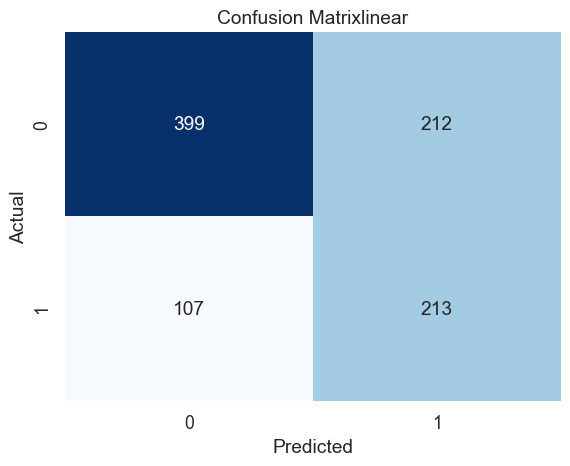

Kernel:  poly
{'auc': 0.8172437602291327,
 'f1-score': 0.8382838283828383,
 'precision': 0.8452579034941764,
 'recall': 0.8314238952536824,
 'support': 611.0}


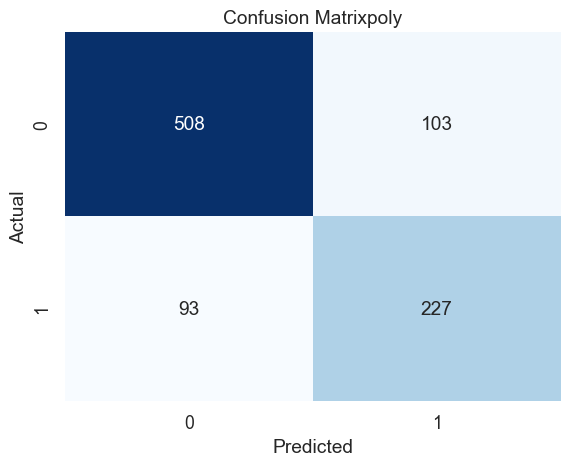

Kernel:  rbf
{'auc': 0.8438829787234042,
 'f1-score': 0.8455696202531645,
 'precision': 0.872822299651568,
 'recall': 0.8199672667757774,
 'support': 611.0}


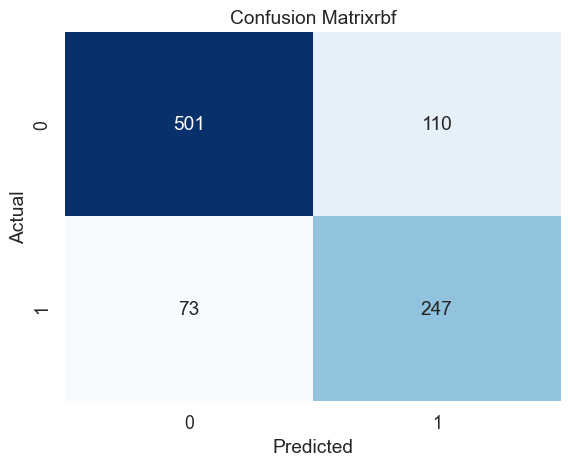

Kernel:  sigmoid
{'auc': 0.6417195171849428,
 'f1-score': 0.5073800738007379,
 'precision': 0.5813953488372093,
 'recall': 0.4500818330605565,
 'support': 611.0}


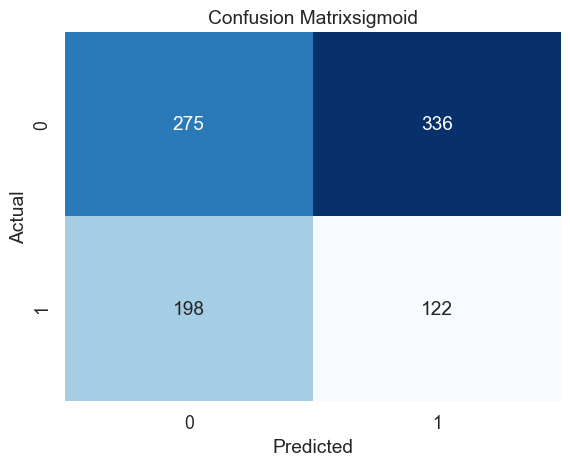



BEST ONE:  {'precision': 0.872822299651568, 'recall': 0.8199672667757774, 'f1-score': 0.8455696202531645, 'support': 611.0, 'auc': 0.8438829787234042}


In [57]:
# 根據情況調整參數
# 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_svm_repo = None

best_svm_model = None
# SMOTE後的資料
for kernel in kernels:
    if best_svm_repo is None:
        best_svm_repo = svm_model(kernel, x_train_resampled, y_train_resampled, x_test, y_test)
    else:
        cur_svm_repo = svm_model(kernel, x_train_resampled, y_train_resampled, x_test, y_test)
        if cur_svm_repo['auc'] > best_svm_repo['auc']:
            best_svm_repo = cur_svm_repo
print("\n\nBEST ONE: ", best_svm_repo)

使用 Radial Basis Function (RBF) 的效果最佳。

Kernel:  linear
{'auc': 0.6768233428805237,
 'f1-score': 0.7911764705882353,
 'precision': 0.7182910547396528,
 'recall': 0.8805237315875614,
 'support': 611.0}


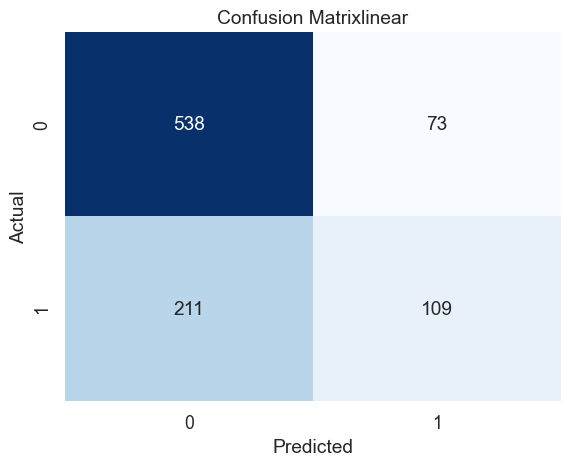



BEST ONE:  {'precision': 0.872822299651568, 'recall': 0.8199672667757774, 'f1-score': 0.8455696202531645, 'support': 611.0, 'auc': 0.8438829787234042}
Kernel:  poly
{'auc': 0.8219235883797054,
 'f1-score': 0.8847023360964581,
 'precision': 0.8198324022346368,
 'recall': 0.9607201309328969,
 'support': 611.0}


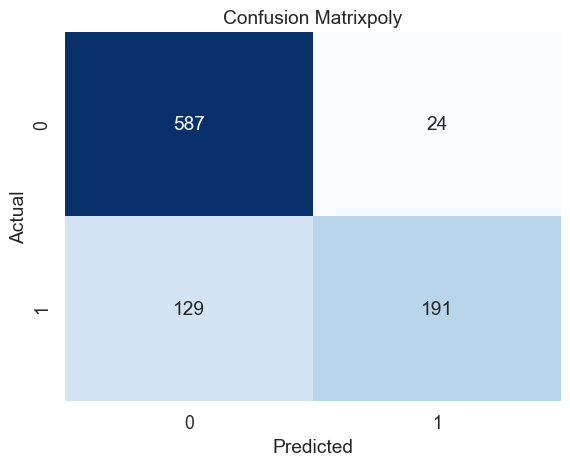



BEST ONE:  {'precision': 0.872822299651568, 'recall': 0.8199672667757774, 'f1-score': 0.8455696202531645, 'support': 611.0, 'auc': 0.8438829787234042}
Kernel:  rbf
{'auc': 0.8455068535188216,
 'f1-score': 0.8927756653992396,
 'precision': 0.8338068181818182,
 'recall': 0.9607201309328969,
 'support': 611.0}


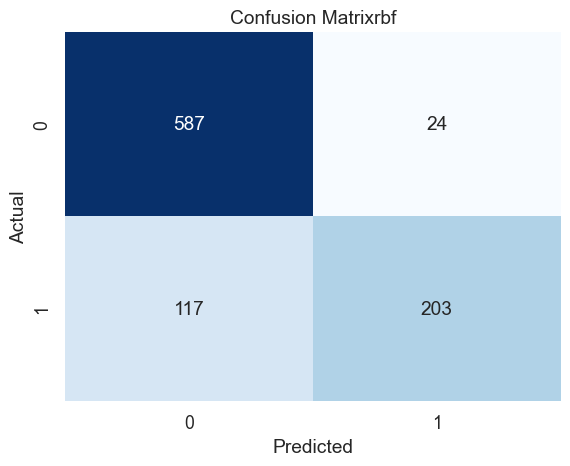



BEST ONE:  {'precision': 0.8338068181818182, 'recall': 0.9607201309328969, 'f1-score': 0.8927756653992396, 'support': 611.0, 'auc': 0.8455068535188216}
Kernel:  sigmoid
{'auc': 0.6128247749590834,
 'f1-score': 0.6232709519934907,
 'precision': 0.6197411003236246,
 'recall': 0.6268412438625205,
 'support': 611.0}


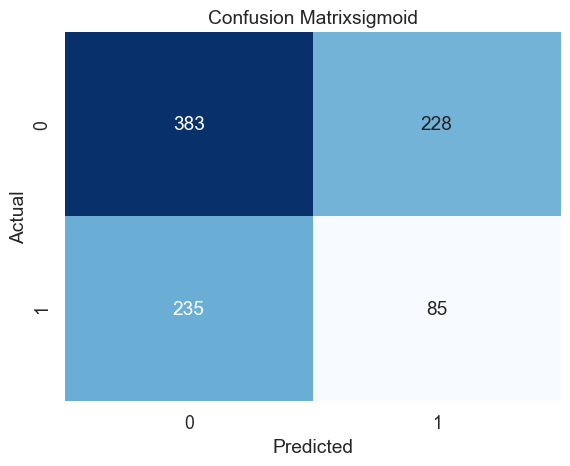



BEST ONE:  {'precision': 0.8338068181818182, 'recall': 0.9607201309328969, 'f1-score': 0.8927756653992396, 'support': 611.0, 'auc': 0.8455068535188216}


In [58]:
for kernel in kernels:
    if best_svm_repo is None:
        best_svm_repo = svm_model(kernel, x_train, y_train, x_test, y_test)
        
    else:
        cur_svm_repo = svm_model(kernel, x_train, y_train, x_test, y_test)
        if cur_svm_repo['auc'] > best_svm_repo['auc']:
            best_svm_repo = cur_svm_repo
    print("\n\nBEST ONE: ", best_svm_repo)

### MLP

In [59]:
from sklearn.neural_network import MLPClassifier

def mlp_model(x_train, y_train, x_test, y_test, max_iter=100):
    clf_mlp = MLPClassifier(random_state = seed, max_iter=max_iter, momentum=0.99, early_stopping=True, learning_rate_init=0.001)
    clf_mlp.fit(x_train, y_train)

    y_pred = clf_mlp.predict(x_test)
    y_pred_prob = clf_mlp.predict_proba(x_test)[:, 1]
    repo = eval_pipeline(y_test, y_pred, y_pred_prob)
    plot_confusion_matrix(y_test, y_pred)
    return repo


{'auc': 0.8277848813420622,
 'f1-score': 0.790820829655781,
 'precision': 0.8582375478927203,
 'recall': 0.7332242225859247,
 'support': 611.0}


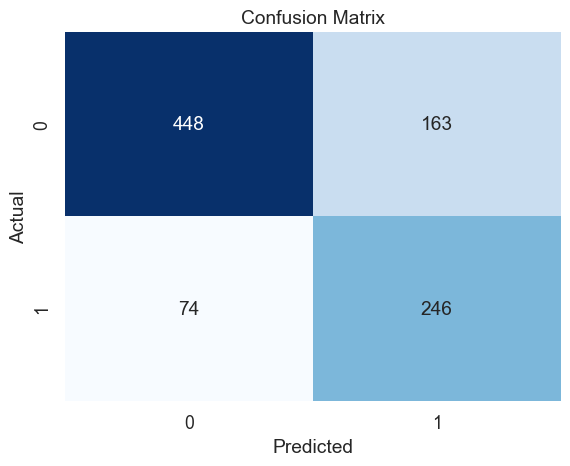

{'auc': 0.8277848813420622,
 'f1-score': 0.790820829655781,
 'precision': 0.8582375478927203,
 'recall': 0.7332242225859247,
 'support': 611.0}


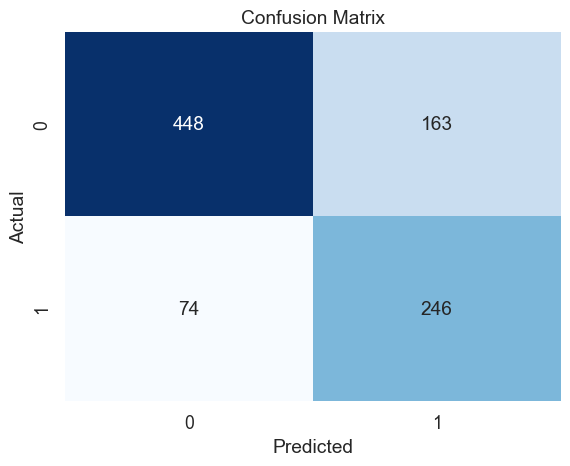

{'auc': 0.8277848813420622,
 'f1-score': 0.790820829655781,
 'precision': 0.8582375478927203,
 'recall': 0.7332242225859247,
 'support': 611.0}


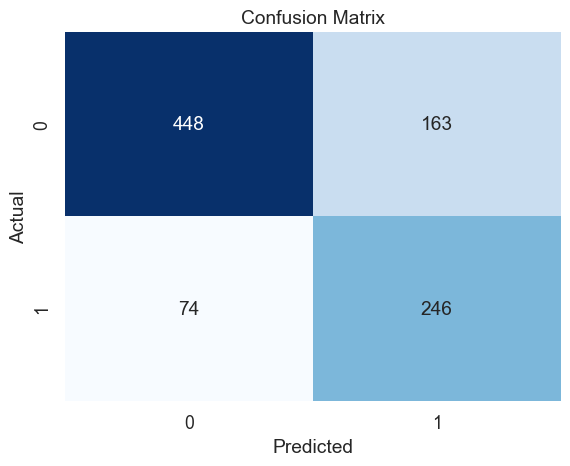



BEST ONE:  {'precision': 0.8582375478927203, 'recall': 0.7332242225859247, 'f1-score': 0.790820829655781, 'support': 611.0, 'auc': 0.8277848813420622}


In [60]:
# SMOTE
best_mlp_repo = None
for max_iter in range(200, 601, 200):
    if best_mlp_repo is None:
        best_mlp_repo = mlp_model(x_train_resampled, y_train_resampled, x_test, y_test, max_iter)
    else:
        cur_mlp_repo = mlp_model(x_train_resampled, y_train_resampled, x_test, y_test, max_iter)
        if cur_mlp_repo['auc'] > best_mlp_repo['auc']:
            best_mlp_repo = cur_mlp_repo
print("\n\nBEST ONE: ", best_mlp_repo)

{'auc': 0.8380242430441898,
 'f1-score': 0.8774094063222823,
 'precision': 0.8294460641399417,
 'recall': 0.9312602291325696,
 'support': 611.0}


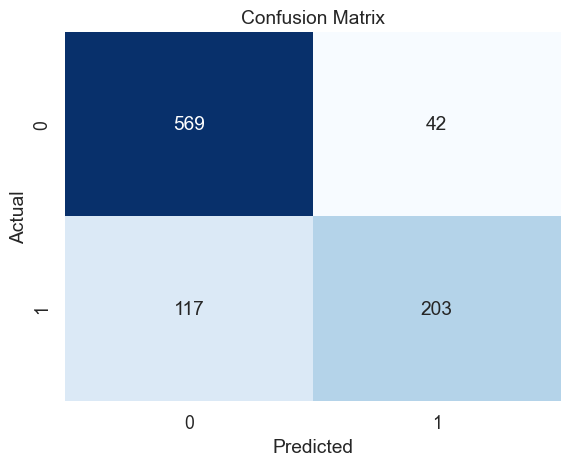

{'auc': 0.8380242430441898,
 'f1-score': 0.8774094063222823,
 'precision': 0.8294460641399417,
 'recall': 0.9312602291325696,
 'support': 611.0}


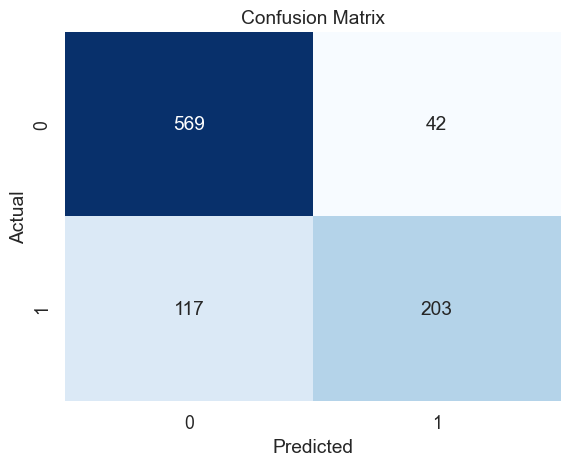

{'auc': 0.8380242430441898,
 'f1-score': 0.8774094063222823,
 'precision': 0.8294460641399417,
 'recall': 0.9312602291325696,
 'support': 611.0}


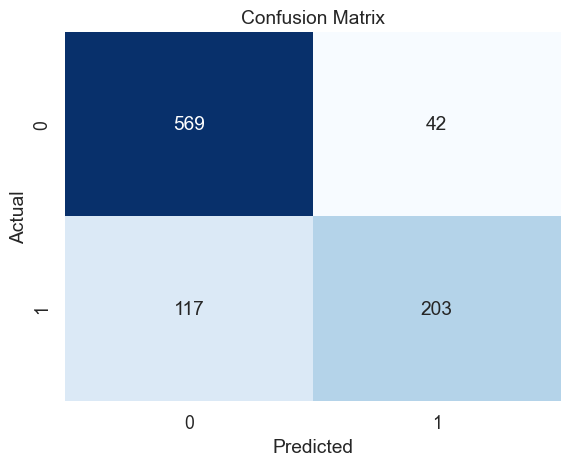



BEST ONE:  {'precision': 0.8294460641399417, 'recall': 0.9312602291325696, 'f1-score': 0.8774094063222823, 'support': 611.0, 'auc': 0.8380242430441898}


In [61]:
# 未使用SMOTE
for max_iter in range(200, 601, 200):
    if best_mlp_repo is None:
        best_mlp_repo = mlp_model(x_train, y_train, x_test, y_test, max_iter)
    else:
        cur_mlp_repo = mlp_model(x_train, y_train, x_test, y_test, max_iter)
        if cur_mlp_repo['auc'] > best_mlp_repo['auc']:
            best_mlp_repo = cur_mlp_repo
print("\n\nBEST ONE: ", best_mlp_repo)

### GBM

In [62]:
# XGBoost
from xgboost import XGBClassifier

def xgb_model(x_train, y_train, x_test, y_test):
    clf_xgb = XGBClassifier(random_state = seed)
    clf_xgb.fit(x_train, y_train)

    y_pred = clf_xgb.predict(x_test)
    y_pred_prob = clf_xgb.predict_proba(x_test)[:, 1]
    report = eval_pipeline(y_test, y_pred, y_pred_prob)
    plot_confusion_matrix(y_test, y_pred)
    return report, clf_xgb
    

{'auc': 0.8642721972176759,
 'f1-score': 0.8738019169329074,
 'precision': 0.8533541341653667,
 'recall': 0.8952536824877251,
 'support': 611.0}


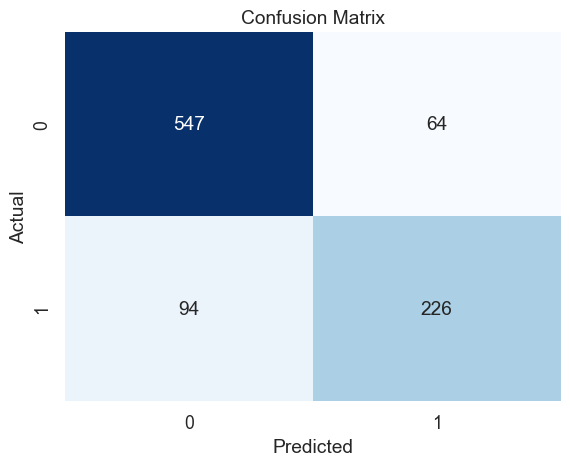

In [63]:
best_xgb_repo, clf_xgb = xgb_model(x_train_resampled, y_train_resampled, x_test, y_test)

In [64]:
model_reports = {
    'svm': best_svm_repo,
    'mlp': best_mlp_repo,
    'xgb': best_xgb_repo
}
pprint(model_reports)

{'mlp': {'auc': 0.8380242430441898,
         'f1-score': 0.8774094063222823,
         'precision': 0.8294460641399417,
         'recall': 0.9312602291325696,
         'support': 611.0},
 'svm': {'auc': 0.8455068535188216,
         'f1-score': 0.8927756653992396,
         'precision': 0.8338068181818182,
         'recall': 0.9607201309328969,
         'support': 611.0},
 'xgb': {'auc': 0.8642721972176759,
         'f1-score': 0.8738019169329074,
         'precision': 0.8533541341653667,
         'recall': 0.8952536824877251,
         'support': 611.0}}


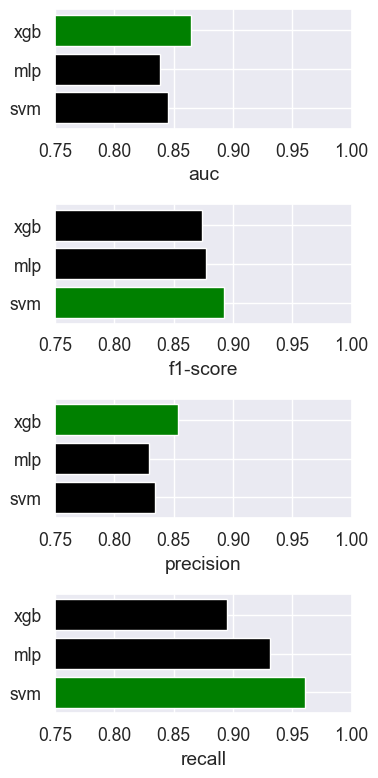

In [65]:
# Create subplots for each metric
fig, axs = plt.subplots(4, figsize=(4,8))

metrics = ['auc', 'f1-score', 'precision', 'recall']

for i, metric in enumerate(metrics):
    values = [model[metric] for model in model_reports.values()]
    max_value = max(values)
    bar_colors = ['green' if value == max_value else 'black' for value in values]
    axs[i].barh(list(model_reports.keys()), values, color=bar_colors)
    axs[i].set_xlabel(metric)
    axs[i].set_xlim([0.75, 1])  # Adjust this as needed

plt.tight_layout()
plt.show()

## Logistic Regression, Decision Tree, Knn

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
def Grid_Search(clf, param_grid, x_train, y_train):
    # 使用GridSearchCV進行交叉驗證
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    grid_search.fit(x_train, y_train)

    # 獲取結果
    print(grid_search.best_params_)

### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

clf_logistic = LogisticRegression(random_state = seed)

def call_model(clf, x_train, y_train, x_test, y_test):
    # clf = LogisticRegression(random_state = seed)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)
    y_pred_prob = clf.predict_proba(x_test)[:, 1]
    eval_pipeline(y_test, y_pred, y_pred_prob)
    plot_confusion_matrix(y_test, y_pred)

{'auc': 0.7083188420621931,
 'f1-score': 0.7339285714285714,
 'precision': 0.8074656188605108,
 'recall': 0.6726677577741408,
 'support': 611.0}


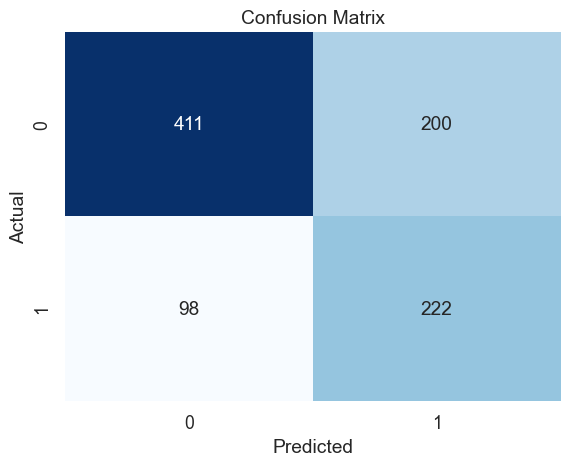

In [69]:
# SMOTE
call_model(clf_logistic, x_train_resampled, y_train_resampled, x_test, y_test)

{'auc': 0.7213456423895255,
 'f1-score': 0.7907669396872672,
 'precision': 0.7254098360655737,
 'recall': 0.8690671031096563,
 'support': 611.0}


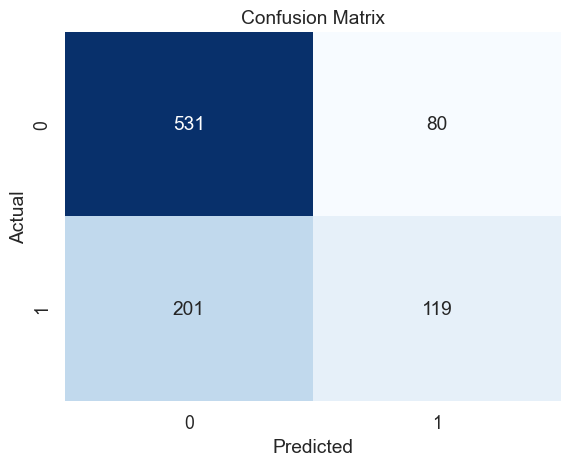

In [70]:
# Non-SMOTE
call_model(clf_logistic, x_train, y_train, x_test, y_test)

In [71]:
features = data.columns[:-1]
coefficients = clf_logistic.coef_

for feature, coef in zip(features, coefficients[0]):
    print(f"{feature}: {coef}")

Education: 0.2088362313628319
JoiningYear: 0.33427597899053574
City: 0.28306948388982284
PaymentTier: 0.26958892281867675
Age: -0.13195628609437904
Gender: 0.4022361121790199
EverBenched: 0.17794964516624612
ExperienceInCurrentDomain: -0.05637859757233785


### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier 

clf_dtree = DecisionTreeClassifier(random_state = seed)

{'auc': 0.7839632774140753,
 'f1-score': 0.8451612903225807,
 'precision': 0.8330683624801272,
 'recall': 0.8576104746317512,
 'support': 611.0}


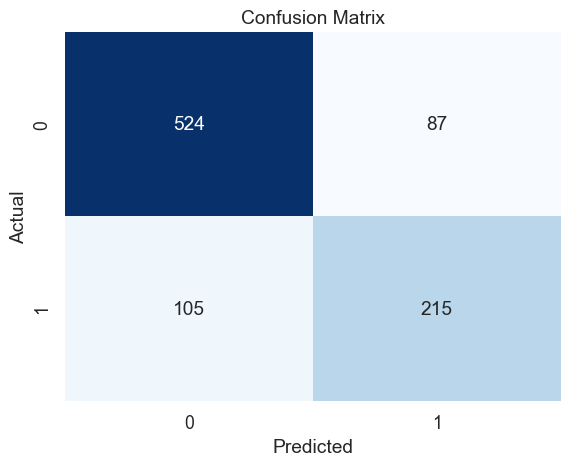

In [73]:
# SMOTE
call_model(clf_dtree, x_train_resampled, y_train_resampled, x_test, y_test)

{'auc': 0.7910929828150574,
 'f1-score': 0.8528,
 'precision': 0.8341158059467919,
 'recall': 0.8723404255319149,
 'support': 611.0}


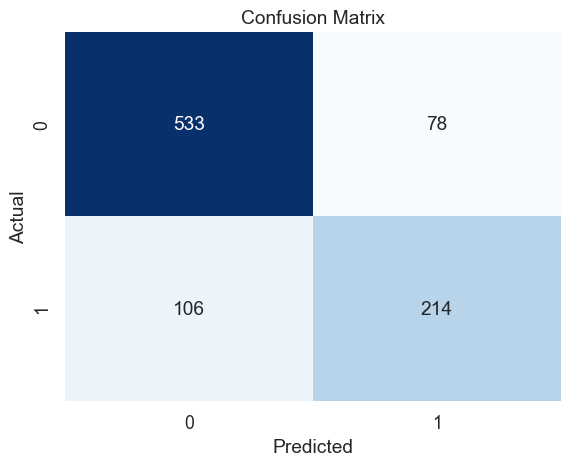

In [74]:
# Non-SMOTE
call_model(clf_dtree, x_train, y_train, x_test, y_test)

In [75]:
param_grid = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 6), 'max_features': range(2, 9)}

Grid_Search(clf_dtree, param_grid, x_train, y_train)

{'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}


{'auc': 0.8630856178396071,
 'f1-score': 0.8861154446177847,
 'precision': 0.8464977645305514,
 'recall': 0.9296235679214403,
 'support': 611.0}


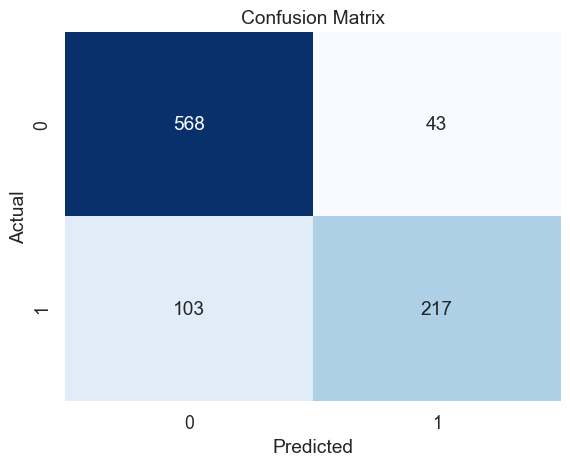

In [76]:
clf_dtree = DecisionTreeClassifier(random_state = seed, max_depth = 8, max_features = 8, min_samples_leaf = 5, min_samples_split = 2)

call_model(clf_dtree, x_train, y_train, x_test, y_test)

In [77]:
# 獲取特徵重要性
feature_importance = clf_dtree.feature_importances_

# 將特徵名稱與其重要性配對並排序
feature_importance_dict = dict(zip(data.columns[:-1], feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# 顯示特徵重要性
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

JoiningYear: 0.3694371835151089
PaymentTier: 0.22506393415639547
City: 0.13528287772401948
Education: 0.10534043518528949
Age: 0.06287472741321691
Gender: 0.050535517564261785
ExperienceInCurrentDomain: 0.0359472863913551
EverBenched: 0.015518038050352904


### Knn

In [78]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=9)

{'auc': 0.8304572422258591,
 'f1-score': 0.8079584775086506,
 'precision': 0.8568807339449541,
 'recall': 0.7643207855973814,
 'support': 611.0}


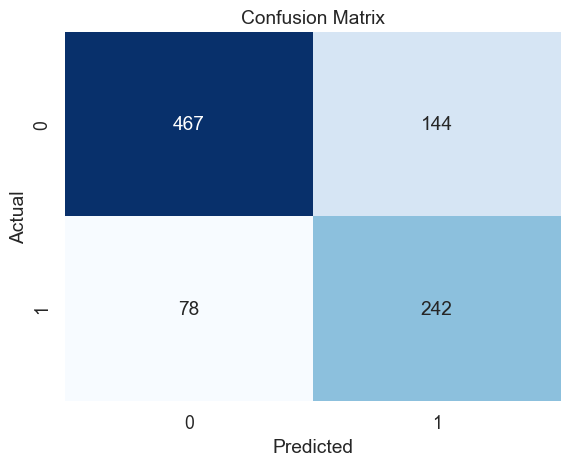

In [79]:
# SMOTE
call_model(clf_knn, x_train_resampled, y_train_resampled, x_test, y_test)

{'auc': 0.8339172463175123,
 'f1-score': 0.8704980842911878,
 'precision': 0.8184438040345822,
 'recall': 0.9296235679214403,
 'support': 611.0}


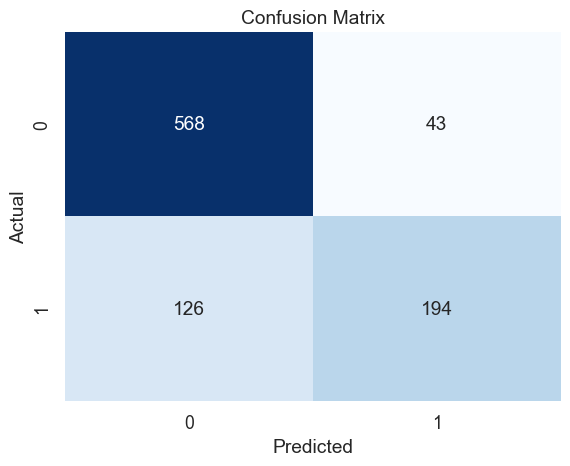

In [80]:
# Non-SMOTE
call_model(clf_knn, x_train, y_train, x_test, y_test)

In [81]:
# 設置參數網格
param_grid = {'n_neighbors': range(1, 11)}

# 使用GridSearchCV進行交叉驗證
grid_search = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)

# 獲取最佳的 n_neighbors 值
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best n_neighbors: {best_n_neighbors}")

Best n_neighbors: 9


{'auc': 0.8339172463175123,
 'f1-score': 0.8704980842911878,
 'precision': 0.8184438040345822,
 'recall': 0.9296235679214403,
 'support': 611.0}


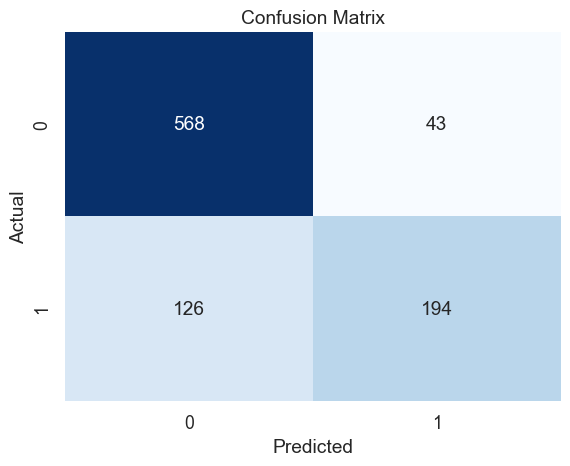

In [82]:
clf_knn = KNeighborsClassifier(n_neighbors=9)

# Non-SMOTE
call_model(clf_knn, x_train, y_train, x_test, y_test)

### 不確定這樣做對不對

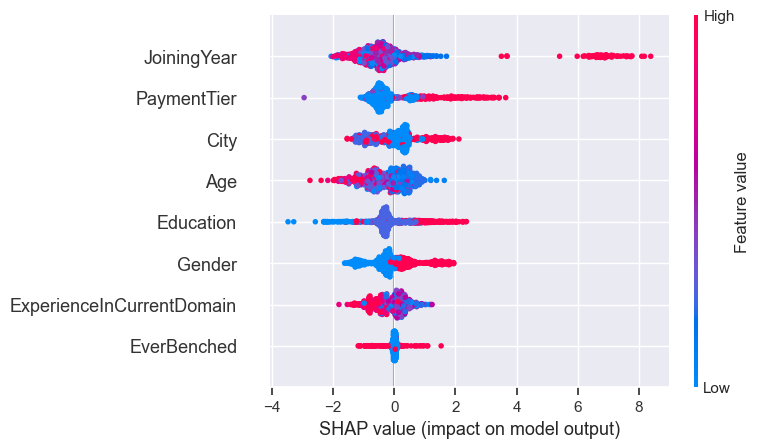

In [83]:
import shap

x_train_copy = pd.DataFrame(x_train, columns = data.columns[:-1])
x_test_copy = pd.DataFrame(x_test, columns = data.columns[:-1])

shap.initjs()

# 創建 SHAP 解釋器
explainer = shap.TreeExplainer(clf_xgb)
# 計算 SHAP 值
shap_values = explainer(x_test_copy)

shap.summary_plot(shap_values, x_test_copy)

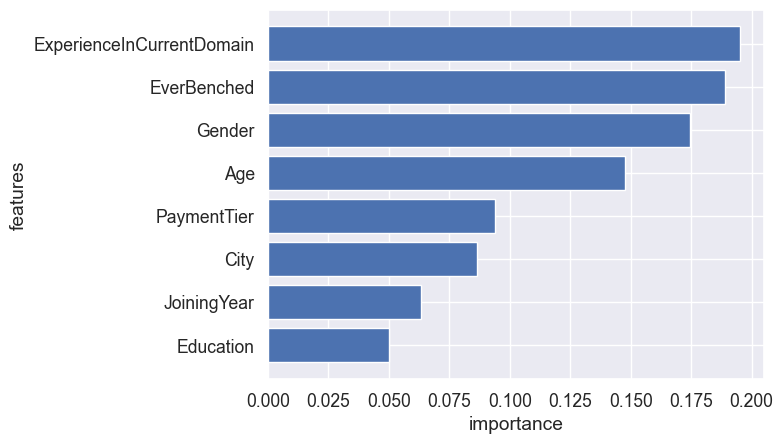

In [96]:
def plot_feature_importances(model):
      n_features = x.shape[1]
      sort_idx = model.feature_importances_.argsort()
      plt.barh(x_train_copy.columns[sort_idx],model.feature_importances_[sort_idx], align="center")
      plt.yticks(np.arange(n_features),x)
      plt.xlabel("importance")
      plt.ylabel("features")
      plt.show
plot_feature_importances(clf_xgb)